## This notebook makes plots in the forecasting overleaf

Here is the link: https://www.overleaf.com/project/68e147bd38d7ce3e40931bf1

(Let me know if you need access.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Dense1dBeamformer import Dense1dBeamformer

## Plots of 1-d beam response

In [2]:
nrand = 5
frand = [ 469, 446, 425, 497, 403 ]
zarand = [ 0, 67, 40, -31, 22 ]

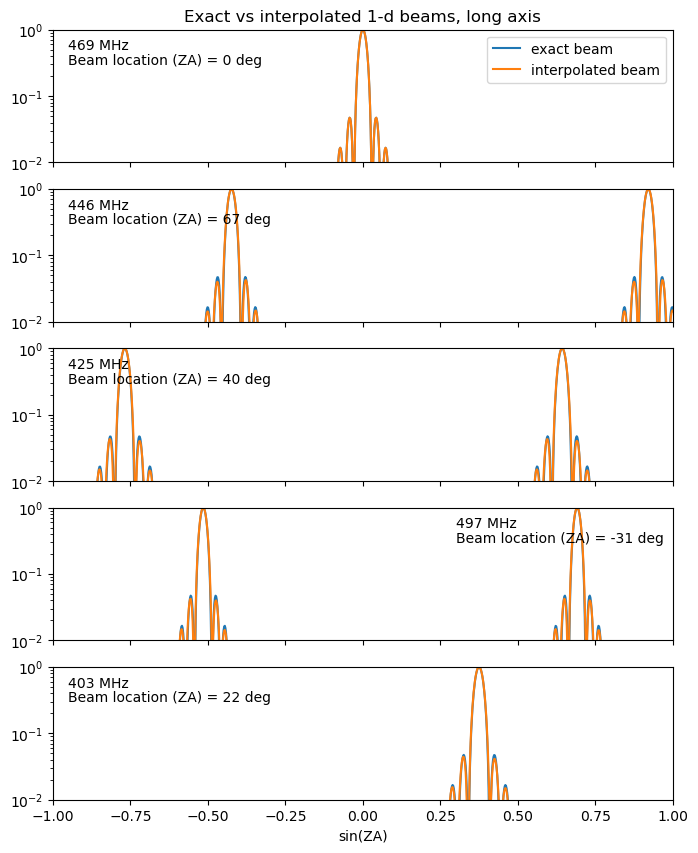

In [3]:
fig, axes = plt.subplots(nrand, 1, figsize=(8, 10), sharex=True)

for i,(ax,freq,za) in enumerate(zip(axes, frand, zarand)):
    bf = Dense1dBeamformer.make_casm256_ns(freq=freq)
    sinza,rx,ri = bf.prepare_beam_plot(sin_za0 = np.sin(za*np.pi/180.))
    ax.plot(sinza,rx,label='exact beam')
    ax.plot(sinza,ri,label='interpolated beam')
    ax.set_yscale('log')
    xtext = 0.3 if (i==3) else -0.95
    ax.text(xtext, 0.5, f'{freq} MHz')
    ax.text(xtext, 0.3, f'Beam location (ZA) = {za} deg')
    ax.set_xlim(-1,1)
    ax.set_ylim(1.0e-2, 1.0)


axes[0].legend(loc='upper right')
axes[0].set_title('Exact vs interpolated 1-d beams, long axis')
plt.xlabel('sin(ZA)')
plt.savefig('beams_ns.pdf')
plt.show()

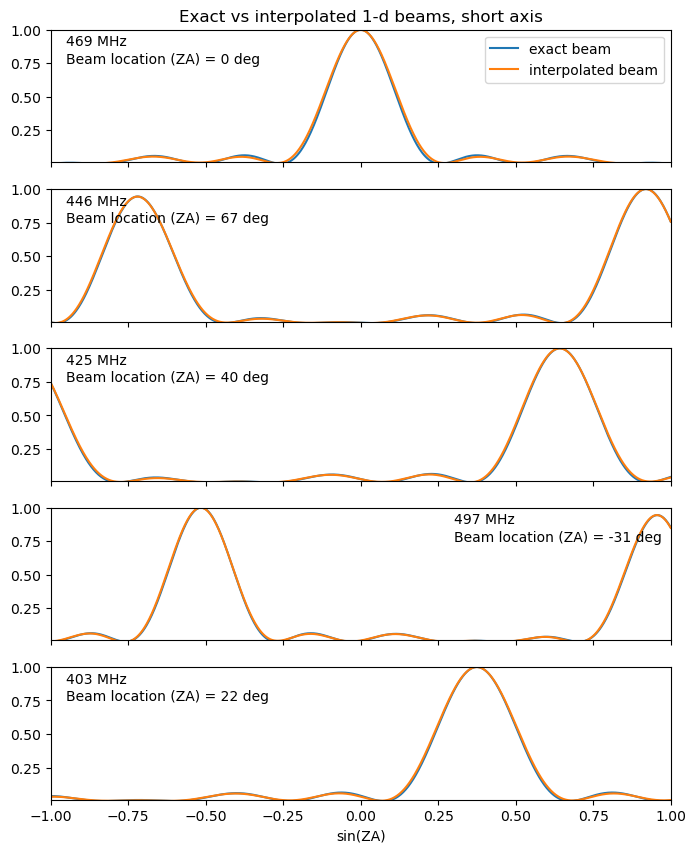

In [4]:
fig, axes = plt.subplots(nrand, 1, figsize=(8, 10), sharex=True)

for i,(ax,freq,za) in enumerate(zip(axes, frand, zarand)):
    bf = Dense1dBeamformer.make_casm256_ew(freq=freq)
    sinza,rx,ri = bf.prepare_beam_plot(sin_za0 = np.sin(za*np.pi/180.))
    ax.plot(sinza,rx,label='exact beam')
    ax.plot(sinza,ri,label='interpolated beam')
    # ax.set_yscale('log')
    xtext = 0.3 if (i==3) else -0.95
    ax.text(xtext, 0.88, f'{freq} MHz')
    ax.text(xtext, 0.75, f'Beam location (ZA) = {za} deg')
    ax.set_xlim(-1,1)
    ax.set_ylim(1.0e-2, 1.0)


axes[0].legend(loc='upper right')
axes[0].set_title('Exact vs interpolated 1-d beams, short axis')
plt.xlabel('sin(ZA)')
plt.savefig('beams_ew.pdf')
plt.show()

## Global correlation plots

In [5]:
nza = 1000
nfreq = 200

szavec = np.linspace(-1,1,nza)
fvec = np.linspace(400,500,nfreq)

In [6]:
rmat_ew = np.zeros((nfreq,nza))

for ifreq in range(nfreq):
    bf = Dense1dBeamformer.make_casm256_ew(fvec[ifreq])
    for iza in range(nza):
        rmat_ew[ifreq,iza] = bf.beam_correlation(szavec[iza])

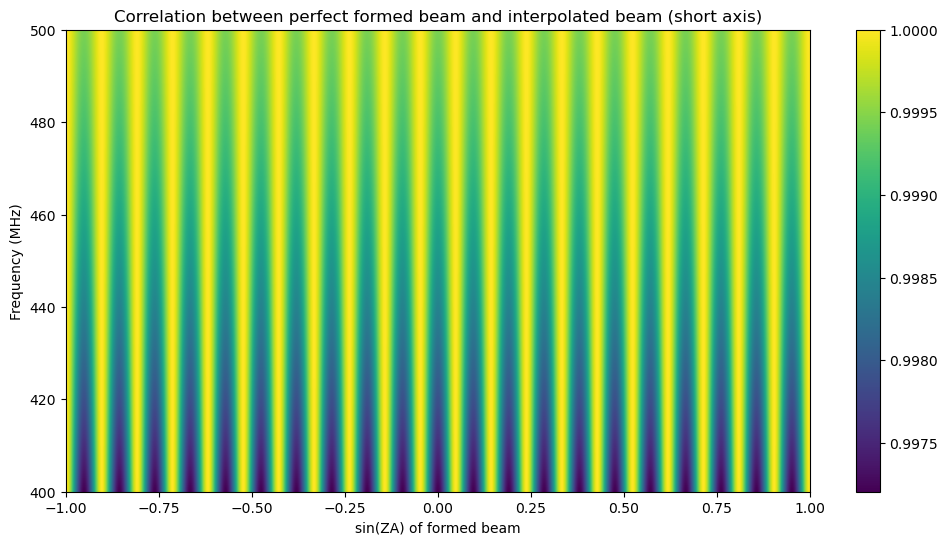

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))  # make the figure taller
im = ax.imshow(rmat_ew, cmap='viridis', extent=[-1,1,400,500], aspect='auto')
fig.colorbar(im)
ax.set_title("Correlation between perfect formed beam and interpolated beam (short axis)")
ax.set_xlabel("sin(ZA) of formed beam")
ax.set_ylabel("Frequency (MHz)")
plt.savefig('corr_ew.pdf')
fig.show()

## Global correlation plot (NS axis)

In [8]:
%%time

rmat_ns = np.zeros((nfreq,nza))

for ifreq in range(nfreq):
    bf = Dense1dBeamformer.make_casm256_ns(fvec[ifreq])
    for iza in range(nza):
        rmat_ns[ifreq,iza] = bf.beam_correlation(szavec[iza])

CPU times: user 43.9 s, sys: 0 ns, total: 43.9 s
Wall time: 43.9 s


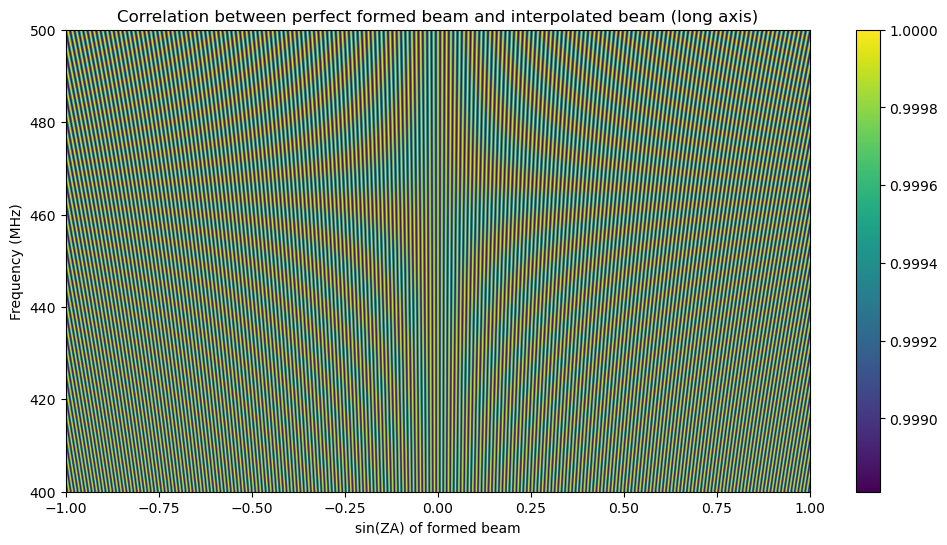

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))  # make the figure taller
im = ax.imshow(rmat_ns, cmap='viridis', extent=[-1,1,400,500], aspect='auto')
fig.colorbar(im)
ax.set_title("Correlation between perfect formed beam and interpolated beam (long axis)")
ax.set_xlabel("sin(ZA) of formed beam")
ax.set_ylabel("Frequency (MHz)")
plt.savefig('corr_ns.pdf')
fig.show()